In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import quimb as qu
import cotengra as ctg
import autoray as ar
# from tcompress import register_ as reg
from tcompress import algo_cooling as algo
from tcompress import quf
import time
import numpy as np
from quimb.tensor.belief_propagation.l2bp import L2BP

In [2]:
import torch
to_backend = algo.backend_torch(device = "cpu", dtype = torch.complex128, requires_grad=False)
to_backend_c = algo.backend_torch(device = "cpu", dtype = torch.complex128, requires_grad=False)

opt = algo.opt_(progbar=False)

In [3]:
#ITF params
J = 1
h = 3.05
delta = 0.1

In [4]:
Lx, Ly = 6, 6
L = Lx * Ly
edges = qtn.edges_2d_square(Lx=Lx, Ly=Ly, cyclic=False)

sites = sorted({ (site,) for edge in edges for site in edge})
N = len(sites)
N
map_1d_2d = { Lx*j+i: (i,j)   for i in range(Lx) for j in range(Ly)}
map_2d_1d = { (i,j):Lx*j+i   for i in range(Lx) for j in range(Ly)}
inds_k = [ f"k{i}"  for i in range(L)]
inds_b = [ f"b{i}"  for i in range(L)]

In [5]:
pepo_t = quf.pepo_trotter_ITF(edges, Lx=Lx, Ly=Ly, to_backend=to_backend_c, h=h, J=J, delta=delta)
pepo_t

PEPO(tensors=36, indices=132, Lx=6, Ly=6, max_bond=2)

In [6]:
t = delta
pepo = pepo_t.copy()
for step in range(20 - 1):
    t += delta
    pepo = algo.apply_pepo(pepo, pepo_t, flat=False, tags=[f"z{step}"])


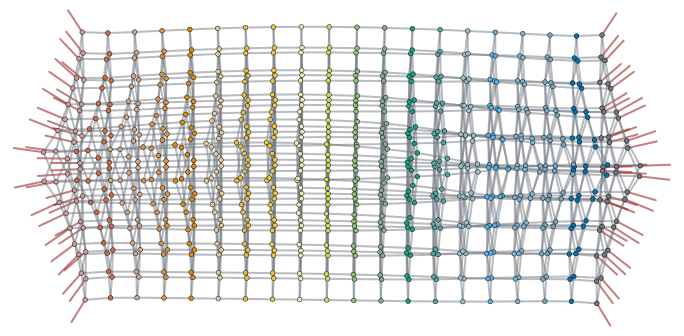

In [7]:
pepo.draw([ f"z{i}" for i in range(20)], legend=False, show_inds=False,
                                 show_tags=False, figsize=(12,12), node_outline_darkness=0.1, 
                                       node_outline_size=None, highlight_inds_color="darkred",
                                      edge_scale=2.0, 
                                      layout="neato",
                                      refine_layout="auto",
                                      highlight_inds=pepo.outer_inds(),
                                      )
